# Интерполяция многочленом Лагранжа

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
eps = 1e-10

In [2]:
class Lagrange:
    def __init__(self, xx, ff):
        self.ff = ff.copy()
        self.xx = xx.copy()
        self.n = xx.shape[0]
        self.Y = []
        for i in range(self.n):
            value = ff[i]
            for j in [p for p in range(self.n) if p != i]:
                value /= (xx[i] - xx[j])
            self.Y.append(value)

    def Pf(self, z):
        value = 0
        for i in range(self.n):
#            print(len(self.xx))
            if abs(z - self.xx[i]) < eps:
                return self.ff[i]
            value += self.Y[i] / (z - self.xx[i])    
        for i in range(self.n):
            value *= (z - self.xx[i])
        return value

Возьмём $f(x) = \sin(x)$,  $a = 0$,  $b = 2\pi$.

Нули многочлена Чебышёва на отрезке $[a, b]$:

$$y_m = \frac{a + b}{2} + \frac{b - a}{2}\cos \frac{\pi(2m - 1)}{2n}, \, m =1,2,...,n$$

n = 5


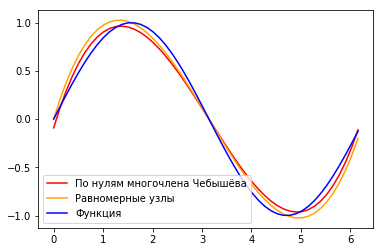

n = 25


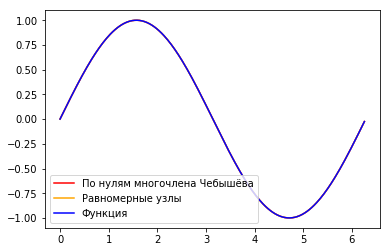

n = 45


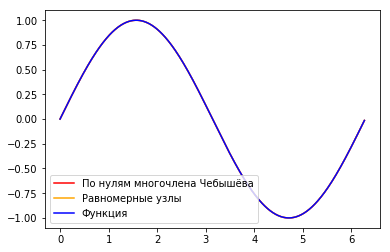

n = 65


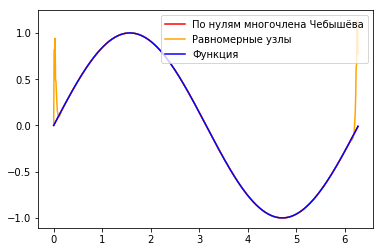

n = 85


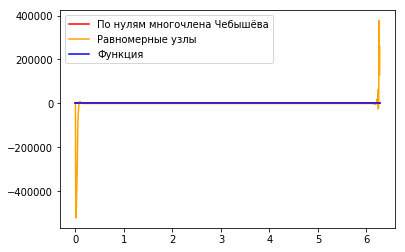

In [3]:
err_ch = []
err_unif = []
nlist = range(1, 100)

for n in nlist:
    xx_ch = (math.pi + math.pi * np.cos(math.pi * (2 * np.arange(1, n + 1) - 1) / (2 * n)))[::-1]
    xx_unif = np.linspace(0, 2 * math.pi, n)
    
    L1 = Lagrange(xx_ch, np.sin(xx_ch))
    L2 = Lagrange(xx_unif, np.sin(xx_unif))
    
    res_ch = []
    res_unif = []
    
    xx = np.arange(0, 2 * math.pi, 2 * math.pi / n / 10)
    for z in xx:
        res_ch.append(L1.Pf(z))
    for z in xx:
        res_unif.append(L2.Pf(z))

    if n % 20 == 5:
        print("n =", n)
        fig = plt.figure()
        plt.plot(xx, res_ch, label = u'По нулям многочлена Чебышёва', color='r')    
        plt.plot(xx, res_unif, label = u'Равномерные узлы', color='orange')
        plt.plot(xx, np.sin(xx), label = u'Функция', color='b')
        plt.legend()
        plt.show()
    
    err_ch.append(np.max(np.abs(res_ch - np.sin(xx))))
    err_unif.append(np.max(np.abs(res_unif - np.sin(xx))))

[]

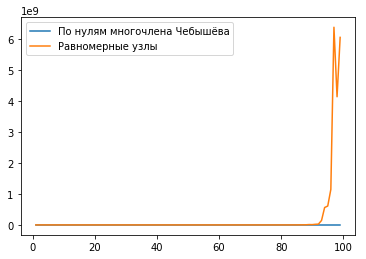

In [4]:
plt.plot(nlist, err_ch, label = u'По нулям многочлена Чебышёва')
plt.plot(nlist, err_unif, label = u'Равномерные узлы')
plt.legend()
plt.plot()